# Predicción de la absorción de carbono en el océano

información del dataset: https://cdiac.ess-dive.lbl.gov/ftp/oceans/GLODAPv2/Data_Products/

Predicción del transporte de contaminantes: utilizando los datos de la circulación oceánica y las mediciones de contaminantes en el agua, se pueden construir modelos predictivos para estimar el transporte de contaminantes en el océano.

## Exploratory Data Analysis 

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
df = pd.read_csv('./data/GLODAPv2 Merged Master File.csv')

In [39]:
df.sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of        cruise  station  cast  year  month  day  hour  minute  latitude  \
0           7      970     1  1992     11   21     0       0  -48.0058   
1           7      973     1  1992     11   23     0       0  -49.0092   
2           7      975     1  1992     11   23     0       0  -49.5000   
3           7      879     3  1992     10   18     0       0  -48.0133   
4           7      964     1  1992     11   20     0       0  -48.0108   
...       ...      ...   ...   ...    ...  ...   ...     ...       ...   
15255     719       26     1  2006      3   21     0       0   35.8600   
15256     719       23     1  2006      3   21     0       0   35.9130   
15257     719       38     1  2007      5    8     0       0   35.9850   
15258     719       27     1  2006      3   21     0       0   35.9110   
15259     719       22     1  2006      3   21     0       0   35.8920   

       longitude  ...     toc  tocf     doc  docf

In [40]:
df.info

<bound method DataFrame.info of        cruise  station  cast  year  month  day  hour  minute  latitude  \
0           7      970     1  1992     11   21     0       0  -48.0058   
1           7      973     1  1992     11   23     0       0  -49.0092   
2           7      975     1  1992     11   23     0       0  -49.5000   
3           7      879     3  1992     10   18     0       0  -48.0133   
4           7      964     1  1992     11   20     0       0  -48.0108   
...       ...      ...   ...   ...    ...  ...   ...     ...       ...   
15255     719       26     1  2006      3   21     0       0   35.8600   
15256     719       23     1  2006      3   21     0       0   35.9130   
15257     719       38     1  2007      5    8     0       0   35.9850   
15258     719       27     1  2006      3   21     0       0   35.9110   
15259     719       22     1  2006      3   21     0       0   35.8920   

       longitude  ...     toc  tocf     doc  docf     don  donf     tdn  tdnf  

In [41]:
df.columns

Index(['cruise', 'station', 'cast', 'year', 'month', 'day', 'hour', 'minute',
       'latitude', 'longitude',
       ...
       'toc', 'tocf', 'doc', 'docf', 'don', 'donf', 'tdn', 'tdnf', 'chla',
       'chlaf'],
      dtype='object', length=101)

In [42]:
df.describe()

,cruise,station,cast,year,month,day,hour,minute,latitude,longitude,...,toc,tocf,doc,docf,don,donf,tdn,tdnf,chla,chlaf
count,15260.000000,15260.000000,15260.000000,15260.000000,15260.000000,15260.000000,15260.000000,15260.000000,15260.000000,15260.000000,...,15260.000000,15260.000000,15260.000000,15260.000000,15260.000000,15260.000000,15260.000000,15260.000000,15260.000000,15260.000000
mean,347.919987,894.160550,4.064220,2001.671232,6.132831,15.874705,6.403932,16.270249,12.598935,-9.023130,...,-9906.619470,8.935780,-9086.577974,8.364220,-9957.042363,8.970642,-9538.848864,8.678899,-9672.018820,8.771101
std,190.853005,4303.049388,23.318664,5.990816,3.166003,8.897353,7.692873,19.542834,44.609750,99.627372,...,960.088711,0.667418,2886.886196,2.011593,646.546733,0.452389,2098.681720,1.464493,1778.462076,1.244990
min,7.000000,0.000000,0.000000,1990.000000,1.000000,1.000000,0.000000,0.000000,-77.960600,-179.829000,...,-9999.000000,2.000000,-9999.000000,2.000000,-9999.000000,2.000000,-9999.000000,2.000000,-9999.000000,2.000000
25%,247.000000,31.000000,1.000000,1996.000000,3.000000,8.000000,0.000000,0.000000,-28.056325,-76.202200,...,-9999.000000,9.000000,-9999.000000,9.000000,-9999.000000,9.000000,-9999.000000,9.000000,-9999.000000,9.000000
50%,314.000000,74.000000,1.000000,2002.000000,6.000000,16.000000,2.000000,5.000000,17.937450,-16.669100,...,-9999.000000,9.000000,-9999.000000,9.000000,-9999.000000,9.000000,-9999.000000,9.000000,-9999.000000,9.000000
75%,487.000000,174.250000,1.000000,2007.000000,9.000000,24.000000,13.000000,32.000000,52.733100,61.195500,...,-9999.000000,9.000000,-9999.000000,9.000000,-9999.000000,9.000000,-9999.000000,9.000000,-9999.000000,9.000000
max,719.000000,84987.000000,421.000000,2013.000000,12.000000,31.000000,23.000000,81.000000,90.000000,180.000000,...,314.000000,9.000000,198.200000,9.000000,16.760000,9.000000,49.170000,9.000000,15.830000,9.000000


In [43]:
df = df.replace(-9999, np.nan)
df = df.fillna(df.mean())

In [44]:
df

,cruise,station,cast,year,month,day,hour,minute,latitude,longitude,...,toc,tocf,doc,docf,don,donf,tdn,tdnf,chla,chlaf
0,7,970,1,1992,11,21,0,0,-48.0058,-6.00250,...,70.477786,9,46.858668,9,5.274138,9,32.294761,9,0.464541,9
1,7,973,1,1992,11,23,0,0,-49.0092,-5.99083,...,70.477786,9,46.858668,9,5.274138,9,32.294761,9,0.464541,9
2,7,975,1,1992,11,23,0,0,-49.5000,-6.00250,...,70.477786,9,46.858668,9,5.274138,9,32.294761,9,0.464541,9
3,7,879,3,1992,10,18,0,0,-48.0133,-5.99833,...,70.477786,9,46.858668,9,5.274138,9,32.294761,9,0.464541,9
4,7,964,1,1992,11,20,0,0,-48.0108,-6.00500,...,70.477786,9,46.858668,9,5.274138,9,32.294761,9,0.464541,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15255,719,26,1,2006,3,21,0,0,35.8600,-5.97800,...,70.477786,9,46.858668,9,5.274138,9,32.294761,9,0.464541,9
15256,719,23,1,2006,3,21,0,0,35.9130,-5.74300,...,70.477786,9,46.858668,9,5.274138,9,32.294761,9,0.464541,9
15257,719,38,1,2007,5,8,0,0,35.9850,-5.36300,...,70.477786,9,46.858668,9,5.274138,9,32.294761,9,0.464541,9
15258,719,27,1,2006,3,21,0,0,35.9110,-5.74700,...,70.477786,9,46.858668,9,5.274138,9,32.294761,9,0.464541,9


In [48]:
df = df[['salinity', 'temperature', 'he3', 'phosphate', 'nitrate', 'oxygen','toc', 'doc', 'latitude', 'longitude', 'depth', 'month', 'year']]

<Axes: >

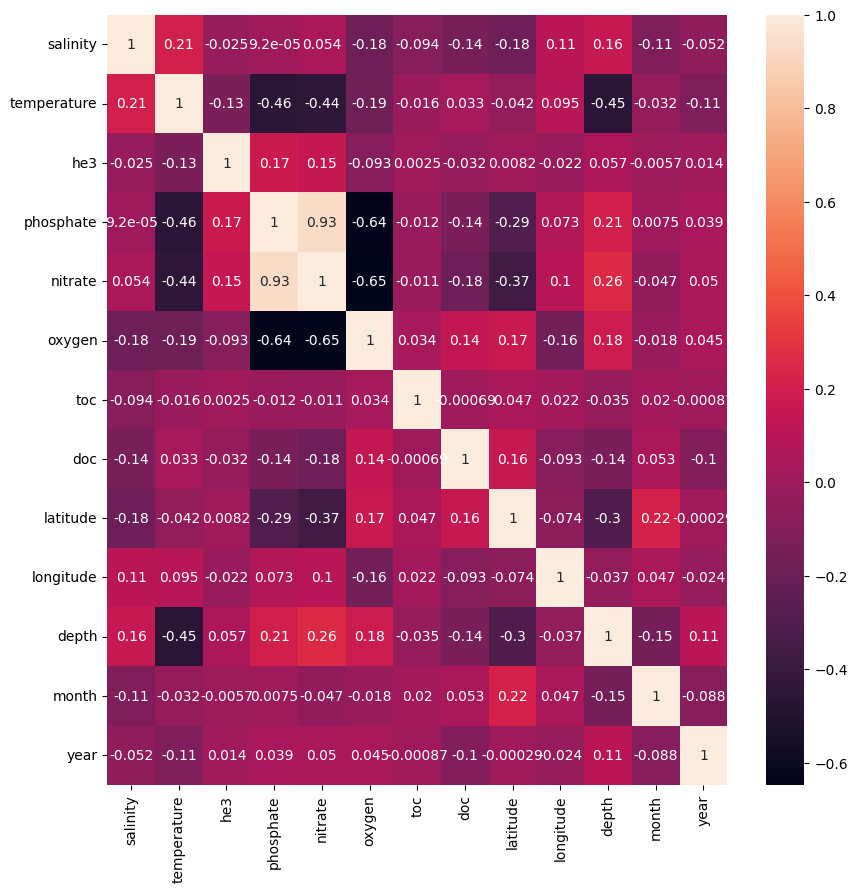

In [50]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

In [46]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Seleccionar las columnas relevantes
df = df[['salinity', 'temperature', 'he3', 'phosphate', 'nitrate', 'oxygen','toc', 'doc', 'latitude', 'longitude', 'depth', 'month', 'year']]

# Eliminar filas con valores faltantes
df = df.dropna()

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df.drop('he3', axis=1), df['he3'], test_size=0.2, random_state=42)

# Entrenar y evaluar diferentes modelos predictivos
models = {'Linear Regression': LinearRegression(),
          'Random Forest Regressor': RandomForestRegressor(n_estimators=100),
          'MLP Regressor': MLPRegressor(hidden_layer_sizes=(50,50,50), max_iter=1000)}

for name, model in models.items():
    print(f'Training {name}')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    print(f'RMSE: {rmse:.2f}')
    print(f'R²: {r2:.2f}')
    print(f'MAE: {mae:.2f}')
    print(f'MSE: {mse:.2f}\n')

Training Linear Regression
RMSE: 1.15
R²: 0.03
MAE: 0.36
MSE: 1.33

Training Random Forest Regressor
RMSE: 1.16
R²: 0.03
MAE: 0.36
MSE: 1.34

Training MLP Regressor
RMSE: 2.25
R²: -2.69
MAE: 1.86
MSE: 5.07



In [51]:
from sklearn.model_selection import GridSearchCV

# Definir un diccionario con los parámetros que se van a ajustar para cada modelo
param_grid = {
    'Linear Regression': {'fit_intercept': [True, False]},
    'Random Forest Regressor': {'n_estimators': [50, 100, 200], 'max_depth': [10, 20, None], 'min_samples_split': [2, 5, 10]},
    'MLP Regressor': {'activation': ['logistic', 'tanh', 'relu'], 'alpha': [0.0001, 0.001, 0.01], 'learning_rate': ['constant', 'invscaling', 'adaptive']}
}


# Crear una instancia de GridSearchCV para cada modelo
grid_search_models = {}
for name, model in models.items():
    grid_search_models[name] = GridSearchCV(model, param_grid[name], cv=5, n_jobs=-1, verbose=2)

# Ajustar los modelos usando GridSearchCV
for name, grid_search_model in grid_search_models.items():
    print(f'Tuning {name}')
    grid_search_model.fit(X_train, y_train)

# Imprimir los mejores parámetros y puntajes de cada modelo
for name, grid_search_model in grid_search_models.items():
    print(f'Best parameters for {name}: {grid_search_model.best_params_}')
    print(f'Best score for {name}: {grid_search_model.best_score_:.2f}\n')


Tuning Linear Regression
Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END .................................fit_intercept=True; total time=   0.0s
[CV] END .................................fit_intercept=True; total time=   0.0s
[CV] END .................................fit_intercept=True; total time=   0.0s
[CV] END ................................fit_intercept=False; total time=   0.0s
[CV] END .................................fit_intercept=True; total time=   0.0s
[CV] END .................................fit_intercept=True; total time=   0.0s
[CV] END ................................fit_intercept=False; total time=   0.0s
[CV] END ................................fit_intercept=False; total time=   0.0s
[CV] END ................................fit_intercept=False; total time=   0.0s
[CV] END ................................fit_intercept=False; total time=   0.0s
Tuning Random Forest Regressor
Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END .ma